In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as path_assistant
shift_02_28_2020 = path_assistant.PathAssistant('shift_02_28_2020', ignore_files=['background_000.ptu'])
shift_02_28_2020.show_time_stamp_file_names()
time_stamp_files_dir = shift_02_28_2020.get_time_stamp_files_dir()

0 11el_000.ptu
1 11el_001.ptu
2 1el_000.ptu
3 1el_001.ptu
4 1el_002.ptu
5 2el_000.ptu
6 2el_001.ptu
7 32el_000.ptu
8 32el_001.ptu
9 3el_000.ptu
10 3el_001.ptu
11 4el_000.ptu
12 4el_001.ptu
13 5el_000.ptu
14 5el_001.ptu


In [2]:
file_name = '1el_000.ptu'
df, n_revolutions = read_event_delays(shift_02_28_2020.get_time_stamp_file_path(file_name))
t_delays = df.delay

ValueError: unsupported pickle protocol: 5

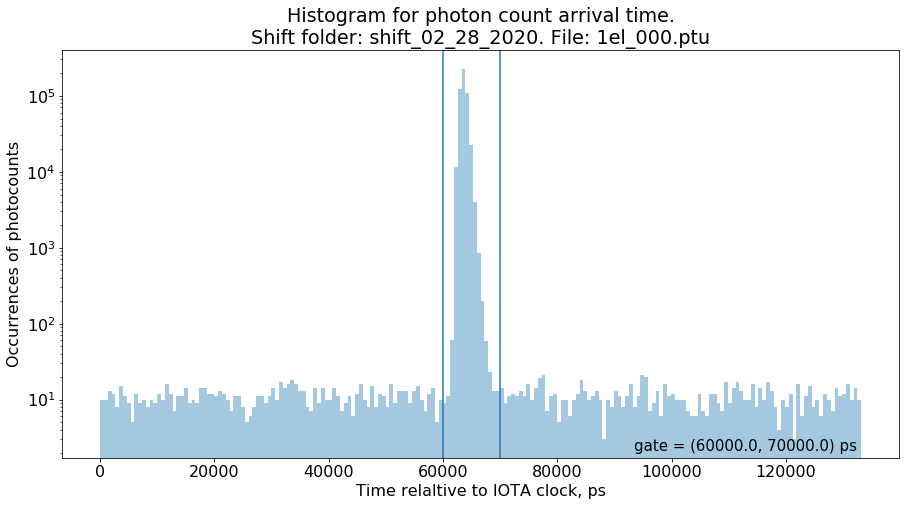

In [14]:
gate = (60000,70000)
plot_arrival_time_hist(t_delays, gate, bins=200, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [15]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [16]:
fanos, report = get_fanos(events, n_revolutions)

p_measured = 0.003296633982559815
chunk_length = 3000830
n_events = 494632
fano_interval = (-0.0033300786782309855, -0.0032481013586208585)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.003306751798669294
fano_mean = -0.00329663459776145
absolute_fano_error = 4.09886598050635e-05


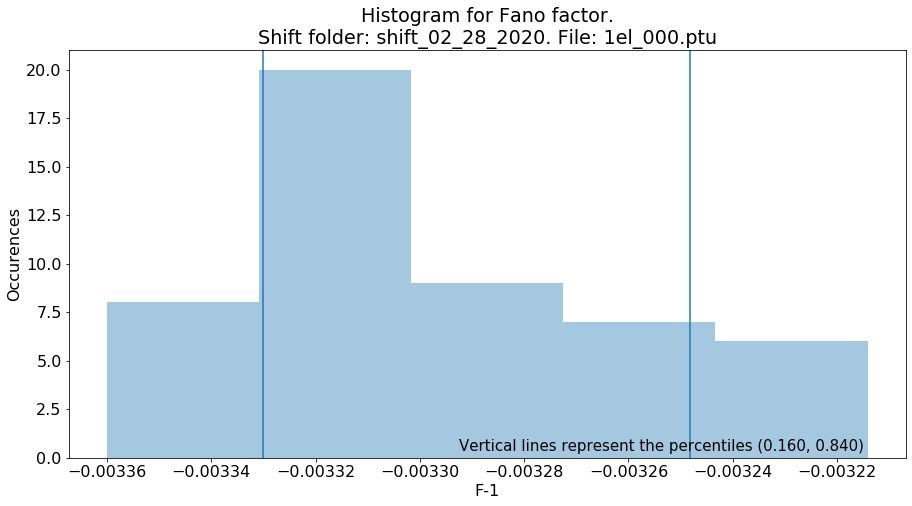

In [17]:
plot_fanos_hist(fanos, report, bins=5, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [18]:
sum(fanos == np.nan)

0

In [19]:
df

,revolution,delay
343,341,62850.0
362,359,62975.0
532,528,63734.0
576,571,63891.0
670,664,63050.0
...,...,...
150879978,150041189,63663.0
150880084,150041294,63753.0
150880212,150041421,63437.0
150880224,150041432,63170.0


In [20]:
t_delays_in_gate = t_delays[t_delays.between(gate[0],gate[1])]
t_delays_in_gate

343          62850.0
362          62975.0
532          63734.0
576          63891.0
670          63050.0
              ...   
150879978    63663.0
150880084    63753.0
150880212    63437.0
150880224    63170.0
150880238    62846.0
Name: delay, Length: 494632, dtype: float64

In [21]:
from ursse.time_structure import split_into_chunks

In [126]:
chunks = split_into_chunks(df,100,n_revolutions,gate)

In [127]:
bunch_lengths = [np.std(chunk) for chunk in chunks]
average_bunch_length = np.mean(bunch_lengths)
counts = [len(chunk) for chunk in chunks]
mean_counts = np.mean(counts)

In [128]:
def generate_one_rms_bunch_length():
    s = np.random.poisson(lam=mean_counts)
    delays = np.random.normal(loc=0,scale=average_bunch_length,size=int(mean_counts))
    return np.std(delays)
bunch_lengths_sim = [generate_one_rms_bunch_length() for c in chunks]
std_of_bunch_length_sim = np.std(bunch_lengths_sim)
print("std_of_bunch_length_sim = {}".format(std_of_bunch_length_sim))
std_of_bunch_length = np.std(bunch_lengths)
print("std_of_bunch_length measured = {}".format(std_of_bunch_length))

std_of_bunch_length_sim = 23.33350154091401
std_of_bunch_length measured = 335.1142205850473


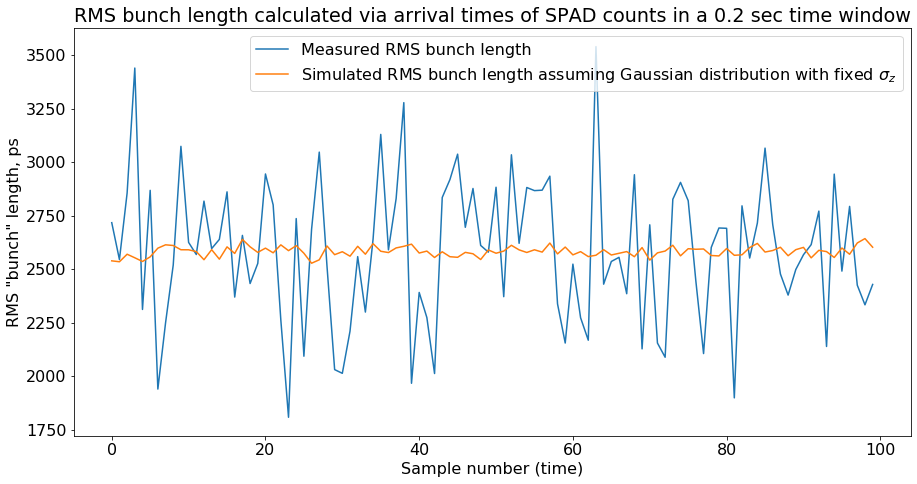

In [129]:
plt.plot(bunch_lengths, label='Measured RMS bunch length')
plt.plot(bunch_lengths_sim, label='Simulated RMS bunch length assuming Gaussian distribution with fixed $\sigma_z$')
plt.ylabel('RMS "bunch" length, ps')
plt.xlabel('Sample number (time)')
plt.legend()
plt.title('RMS bunch length calculated via arrival times of SPAD counts in a 0.2 sec time window')
plt.show()

In [136]:
np.mean(bunch_lengths)

2583.8946237962905

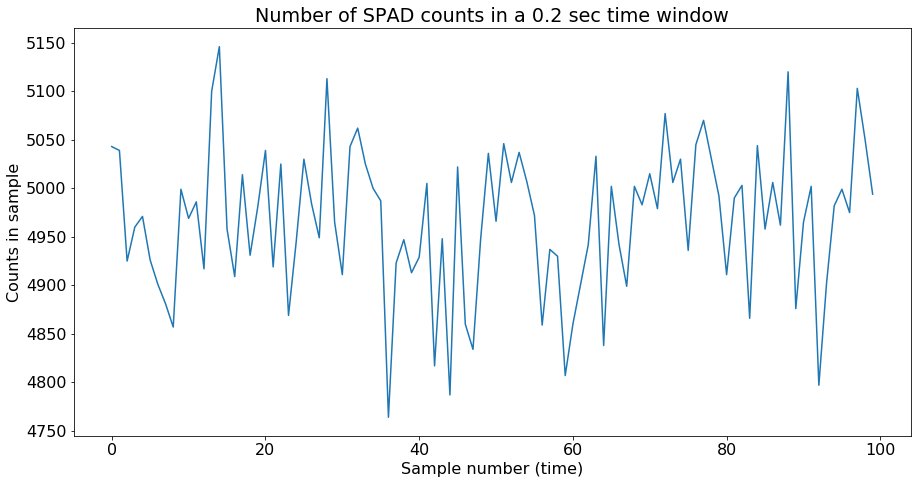

In [131]:
plt.plot(counts)
plt.ylabel('Counts in sample')
plt.xlabel('Sample number (time)')
plt.title('Number of SPAD counts in a 0.2 sec time window')
plt.show()

In [132]:
np.std(counts)

75.40396276058706

In [133]:
np.sqrt(np.mean(counts))

70.4746763029104

In [134]:
mean_counts = np.mean(counts)

In [135]:
20/100

0.2